In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Customer segmentation 

Customer segmentation is the process of dividing customers into groups based on common characteristics so companies can market to each group effectively and appropriately.

In [2]:
data = pd.read_csv('/home/user/Downloads/Mall_Customers.csv')

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
X = data.drop('CustomerID',axis=1)

In [5]:
X = pd.get_dummies(X,drop_first=True)

In [6]:
X.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [7]:
### Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1,30):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) #inertia is the sum of diff between centroid and corrsponding datapoint
    print('k:',i," wcss:",kmeans.inertia_)
    

k: 1  wcss: 308862.06000000006
k: 2  wcss: 212889.44245524294
k: 3  wcss: 143391.59236035674
k: 4  wcss: 104414.67534220174
k: 5  wcss: 75399.61541401486
k: 6  wcss: 58348.64136331504
k: 7  wcss: 51132.70321257687
k: 8  wcss: 47641.452539276586
k: 9  wcss: 40857.18667502088
k: 10  wcss: 37649.905433455446
k: 11  wcss: 34846.23876678876
k: 12  wcss: 32687.496901709394
k: 13  wcss: 30992.046490111214
k: 14  wcss: 28497.730010893225
k: 15  wcss: 26798.199328449326
k: 16  wcss: 24537.049496989926
k: 17  wcss: 23088.832830323267
k: 18  wcss: 22086.891057961653
k: 19  wcss: 21205.22992350786
k: 20  wcss: 20321.947214142067
k: 21  wcss: 18991.270978144665
k: 22  wcss: 18112.679262112157
k: 23  wcss: 16843.60449844273
k: 24  wcss: 16198.551323839554
k: 25  wcss: 15381.51882006881
k: 26  wcss: 15077.52144522144
k: 27  wcss: 14345.635317460321
k: 28  wcss: 13969.89563492064
k: 29  wcss: 13311.690079365084


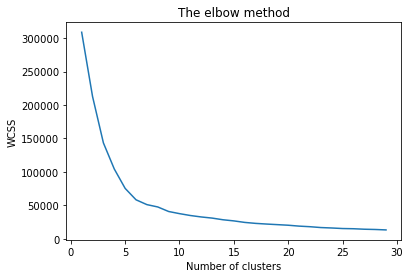

In [8]:
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 30), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [9]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', max_iter = 100, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

In [10]:
kmeans.n_iter_

5

In [11]:
y_kmeans

array([5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4,
       5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 3, 4, 3, 2,
       5, 4, 3, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2,
       3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2,
       2, 3, 3, 2, 3, 2, 2, 2, 3, 2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3,
       3, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int32)

In [12]:
data['Cluster'] = y_kmeans

In [13]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,5
1,2,Male,21,15,81,4
2,3,Female,20,16,6,5
3,4,Female,23,16,77,4
4,5,Female,31,17,40,5


In [14]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15,15)})

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

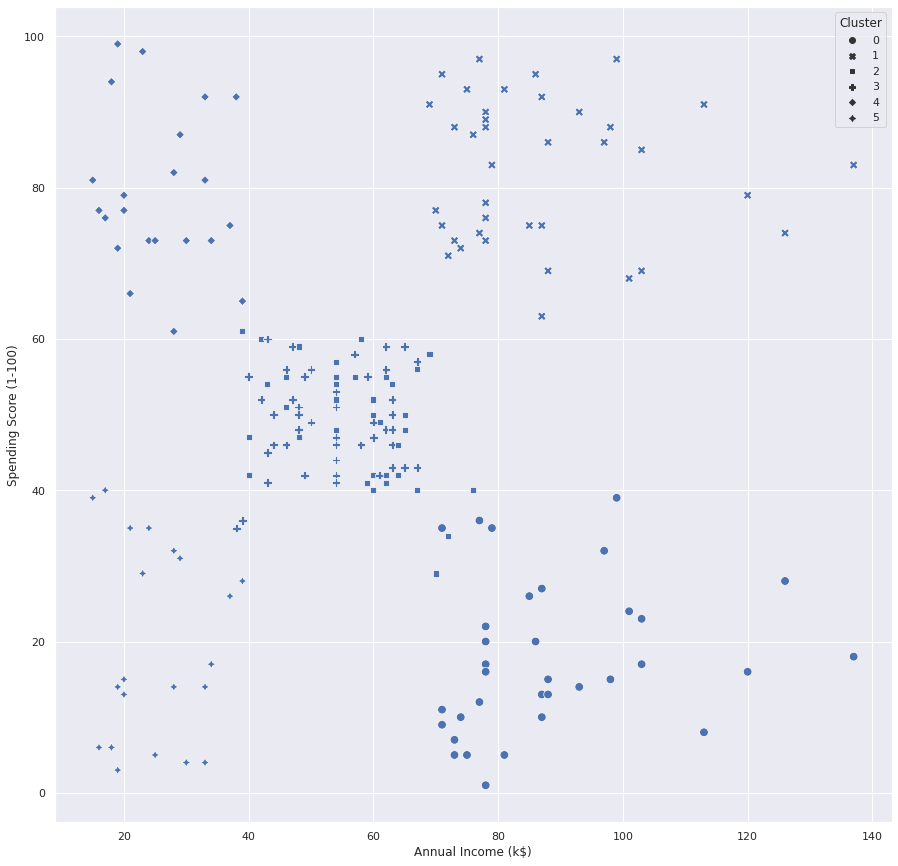

In [15]:
sns.scatterplot(data=data, x="Annual Income (k$)", y="Spending Score (1-100)",style='Cluster',s=75)

In [16]:
#End